# **Intro**

#### The scatterplot is used to visualize how well two variables relate to each other. Sometimes, this two variables can be approximated by a straight line ($y=ax+b$). What`s the **BEST** straight line that describes this relationship?  

Let's analyze how study hours relate to the score obtained by a student in an assessment. The Student studied $X$ hours and get $Y$ score.

<center>

| <h5>$X$ (Hour of study)</h5> | <h5>$Y$ (Score)</h5>   |
|-----------------------------:|-----------------------:|
|       <h5>$0$</h5>           |     <h5>$4.0$</h5>     |
|       <h5>$1$</h5>           |     <h5>$6.5$</h5>     |
|       <h5>$1$</h5>           |     <h5>$7.5$</h5>     |
|       <h5>$2$</h5>           |     <h5>$5.5$</h5>     |
|       <h5>$2$</h5>           |     <h5>$6.0$</h5>     |
|       <h5>$2.5$</h5>         |     <h5>$9.5$</h5>     |
|       <h5>$3$</h5>           |     <h5>$7.0$</h5>     |
|       <h5>$4$</h5>           |     <h5>$9.0$</h5>     |

</center>

#### The ***Linear Correlation Coefficient*** (**LLC**) tell us how well the data in question can be approximated by a straight line. We can find $LLC$ using the following formula.  

$$LLC = \dfrac{\sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{n\sigma_x\sigma_y} = \dfrac{\sum_{i=1}^{n}(x_iy_i) - n\overline{x}\overline{y}}{n\sigma_x\sigma_y}$$

#### And the ***Determination Coefficient*** (**DC** a number between 0 and 1 that measures how well a statistical model predicts an outcome) is.

$$DC = LCC^2 \text{  or  } DC\% = LCC^2 * 100$$

In [2]:
import matplotlib.pyplot as plt
import numpy as np

study_hours = [0, 1, 1, 2, 2, 2.5, 3, 4]
score = [4.0, 6.5, 7.5, 5.5, 6.0, 9.5, 7.0, 9.0]

# Scatterplot of the Variables



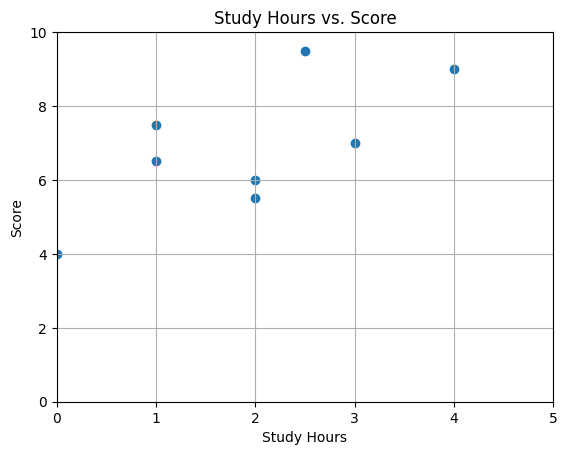

In [3]:
plt.scatter(study_hours, score)
plt.grid(True)
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.title('Study Hours vs. Score')
plt.ylim(0, 10)
plt.xlim(0, 5)
plt.show()

# Calculating *features*

In [4]:
sum: float = 0.0
for i in range(len(study_hours)):
  sum += study_hours[i] * score[i]

study_hours_std = np.std(study_hours)
score_std = np.std(score)

print(f'[+] std(X)  =\t {round(study_hours_std, 3)}')
print(f'[+] std(Y)  =\t {round(score_std, 3)}')

study_hours_mean = np.mean(study_hours)
score_mean = np.mean(score)

print(f'[+] mean(X) =\t {round(study_hours_mean, 3)}')
print(f'[+] mean(Y) =\t {round(score_mean, 3)}')


n = len(study_hours)

lcc = (sum - (n * study_hours_mean * score_mean)) / (n * study_hours_std * score_std)
dc = (lcc ** 2) * 100
vif = 1/ (1 - (lcc ** 2))

print(f'[+] LCC(X, Y) =\t{round(lcc, 3)}')
print(f'[+] DC(LCC)   =\t{round(dc, 2)}%')
print(f'[+] VIF(LCC)  =\t{round(vif, 3)}')

[+] std(X)  =	 1.184
[+] std(Y)  =	 1.691
[+] mean(X) =	 1.938
[+] mean(Y) =	 6.875
[+] LCC(X, Y) =	0.698
[+] DC(LCC)   =	48.77%
[+] VIF(LCC)  =	1.952


# Approximations

#### I want to find a straight line, in the format $y=ax+b$, such that best describes this relationship between $X$ and $Y$ (i.e. with smallest error possible).

## **Defining Error metrics**

#### The error between the data set point and a point on a straight line (Taking a fixed vertical line at $x_i$) is.

$$ e_i = |y_i - (ax_i + b)|$$

#### And the total error of the Straight line approximation is.

$$e = \sum_{i=1}^{n}e_i$$

#### We will use the ***least squares method*** to find the line with the smallest possible error. To avoid derivatives with modulus, we will adopt a new error metric.

$$E_i = (y_i - ax_i - b)^2$$  
$$E = \sum_{i=1}^{n}E_i$$

#### The E function describes an elliptical paraboloid with a global minimum that follows $\dfrac{∂E}{∂a}(a,b)=0$ and $\dfrac{∂E}{∂b}(a,b)=0$. We need to find $a$ (Angular coef.) and $b$ (Linear coef.). Starting with $b$.  

$$\dfrac{∂E}{∂b}(a,b)=0 → \dfrac{∂}{∂b}\Big{(}\sum_{i=1}^{n}(y_i - ax_i - b)^2\Big{)} = \sum_{i=1}^{n}2(y_i - ax_i - b)(-1) = -2n\overline{y} + 2an\overline{x} + 2bn = 0 → b=\overline{y}-a\overline{x}\,\,(1)$$  

#### Remember that $\overline{x} = \dfrac{\sum_{}^{n}x_i}{n}$, so $\sum_{}^{n}x_i = n\overline{x}$. Now the same for $a$.  

$$\dfrac{∂E}{∂a}(a,b)=0 → \dfrac{∂}{∂a}\Big{(}\sum_{i=1}^{n}(y_i - ax_i - b)^2\Big{)}=\sum_{i=1}^{n} 2(y_i - ax_i - b)(-x_i)=-2\sum_{i=1}^{n} x_iy_i+2a\sum_{i=1}^{n}x_i^2+2bn\overline{x}=0$$  

$$-\sum_{i=1}^{n} x_iy_i+a\sum_{i=1}^{n}x_i^2+bn\overline{x}=0→a\sum_{i=1}^{n}x_i^2+bn\overline{x}=\sum_{i=1}^{n} x_iy_i\,\,(2)$$  

#### Using $(1)$ at $bn\overline{x}$ we have.  

$$a\sum_{i=1}^{n}x_i^2+(\overline{y} -a\overline{x})n\overline{x}=\sum_{i=1}^{n} x_iy_i→ a\Big{[}\sum_{i=1}^{n}x_i^2 - n\overline{x}^2\Big{]} = \sum_{i=1}^{n} x_iy_i- n\overline{x}\overline{y}$$  

$$\therefore a = \dfrac{\sum_{}^{n} x_iy_i- n\overline{x}\overline{y}}{\sum_{}^{n}x_i^2 - n\overline{x}^2}\,\,(3)$$

## **Simplifying $a$**

#### The variance of a set of samples $X$ is $σ_X^2 = \dfrac{1}{n}\sum_{}^{n} (x_i - \overline{x})^2$. We can use this to simplify $a$.

$$σ_X^2 = \dfrac{1}{n}\sum_{}^{n} (x_i - \overline{x})^2 = \dfrac{1}{n}\sum_{}^{n} (x_i^2 -2x_i\overline{x} + \overline{x}^2) = \dfrac{1}{n}\sum_{}^{n} (x_i^2 + \overline{x}^2) - \dfrac{1}{n}2n\overline{x}^2 = \dfrac{1}{n}\sum_{}^{n} (x_i^2 + \overline{x}^2) - 2\overline{x}^2$$.  

#### $\overline{x}$ does not depend on index $i$. So we can remove it of the sum.  

$$σ_X^2 = \dfrac{1}{n}\sum_{}^{n} (x_i^2) + \dfrac{1}{n}n\overline{x}^2 - 2\overline{x}^2 = \dfrac{1}{n}\sum_{}^{n} (x_i^2) + \overline{x}^2 - 2\overline{x}^2 = \dfrac{1}{n}\sum_{}^{n} (x_i^2) - \overline{x}^2\,\,(4)$$  


#### Comparing $(4)$ with the denominator of equation $(3)$ for $a$ we have.  

$$σ_X^2=\dfrac{1}{n}\sum_{}^{n} (x_i^2) - \overline{x}^2;\,\,\sum_{}^{n}x_i^2 - n\overline{x}^2$$  

#### Looking at denominator of $(3)$ and for $(4)$ we realise that $(3) = n*(4)$.

$$\therefore a = \dfrac{\sum_{}^{n} x_iy_i- n\overline{x}\overline{y}}{n\sigma_X^2} = \dfrac{\sigma_y}{\sigma_x}LCC$$

## Calculating $y=ax+b$ to see the results




In [5]:
from sklearn.preprocessing import normalize

a: float = lcc * score_std / study_hours_std
b: float = score_mean - a * study_hours_mean

print(f'[+] a =\t{round(a, 4)}')
print(f'[+] b =\t{round(b, 4)}')

y = [a * study_hours[i] + b for i in range(len(study_hours))]

e = 0.0
for i in range(len(study_hours)):
  e += (score[i] - y[i]) ** 2

print(f'[+] Error =\t{round(e, 4)}')

[+] a =	0.9972
[+] b =	4.9429
[+] Error =	11.7187


# Visualizing The *LinearRegression* Model

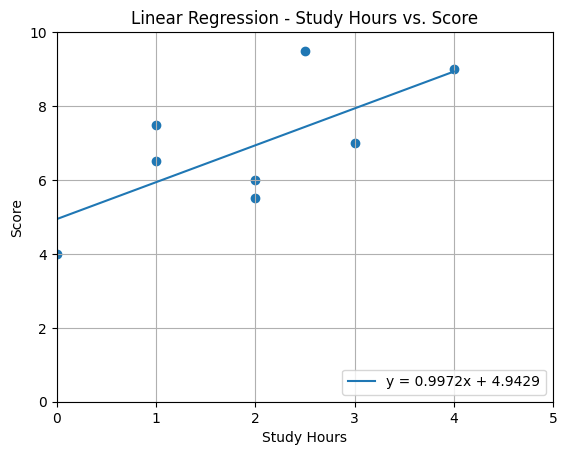

In [7]:
plt.scatter(study_hours, score)
plt.plot(study_hours, y, label=f'y = {round(a, 4)}x + {round(b, 4)}')
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.title('Linear Regression - Study Hours vs. Score')
plt.ylim(0, 10)
plt.xlim(0, 5)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Linear Regression Using *statsmodels.formula.api*

#### Estimation by Ordinary Least Squares (**OLS**). Using the same dataset as before. Looking at the equation $y=ax+b$, we can realise that the $a=0.9972$ and the $b=4.9429$ that is exactly the same that we found with our Calculus!

In [33]:
import statsmodels.formula.api as smf
import pandas as pd

# Converting to a DataFrame
df = pd.DataFrame({
    'study_hours': study_hours,
    'score': score
})

model = smf.ols(formula='score ~ study_hours', data=df)
results = model.fit()

results.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     5.712
Date:                Tue, 25 Jun 2024   Prob (F-statistic):             0.0540
Time:                        19:59:14   Log-Likelihood:                -12.878
No. Observations:                   8   AIC:                             29.76
Df Residuals:                       6   BIC:                             29.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.9429      0.947      5.217      0.002       2.625       7.261
study_hours     0.9972      0.417      2.390      0.054      -0.024       2.018
==============================================================================
Omnibus:                        1.331   Durbin-Watson:                   2.688
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                0.841
Skew:                           0.516   Prob(JB):                        0.657
Kurtosis:                       1.792   Cond. No.                         5.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Calculating the Residues of the Model

#### Is the difference between what was predicted and the real score
### **Formula**

$Res \in \mathbb{R}^n$,
$$Res_i = \text{score}_i - y_i\text{, } i = 1\ldots n$$


In [56]:
# Mean of residues
# np.mean(results.resid)

residues = [score[i] - y[i] for i in range(len(study_hours))]
residues_sum = np.sum(residues)
residues_mean = np.mean(residues)

print(f'[+] Residues      =\t{residues}')
print(f'[+] Residues Sum  =\t{residues_sum}')
print(f'[+] Residues Mean =\t{residues_mean}')


[+] Residues      =	[-0.9428969359331472, 0.5598885793871871, 1.559888579387187, -1.4373259052924787, -0.9373259052924787, 2.064066852367688, -0.9345403899721445, 0.06824512534818972]
[+] Residues Sum  =	2.6645352591003757e-15
[+] Residues Mean =	3.3306690738754696e-16


# Looking at the Distribution of the residues

#### Often we are looking for a **normal** distribution, that is

$$f(x)=\dfrac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}\Big(\frac{x-μ}{\sigma}\Big)^2}$$

#### $\sigma$ is the standard deviation (In this case of the residue) and $\mu$ is the mean. $f(x)$ is a **probability density function**, so you can see that

$$P = \int_{-∞}^{∞}f(x)dx=1$$

#### As we have a very small number of samples, so the distribution will take a non-normal form.


0   -0.942897
1    0.559889
2    1.559889
3   -1.437326
4   -0.937326
5    2.064067
6   -0.934540
7    0.068245
dtype: float64


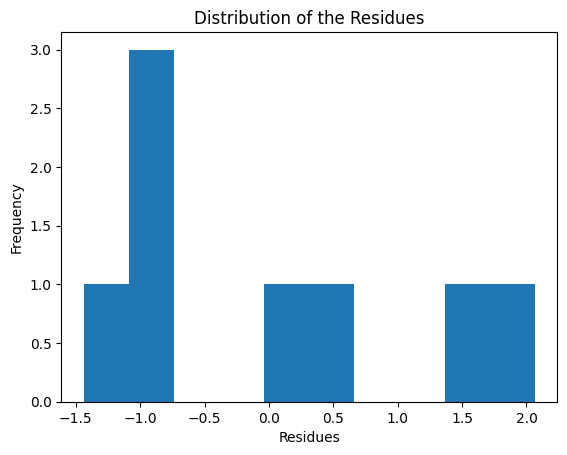

In [63]:
print(results.resid)

plt.hist(results.resid)
plt.xlabel('Residues')
plt.ylabel('Frequency')
plt.title('Distribution of the Residues')
plt.show()